In [1]:
import pandas as pd
from pathlib import *

In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [3]:
list(Path('../data/').iterdir())

[PosixPath('../data/individual_feat_df.csv'),
 PosixPath('../data/bookkeeper-data'),
 PosixPath('../data/matching_feat_df.csv'),
 PosixPath('../data/baseline_main_data.csv'),
 PosixPath('../data/premier_fifa_stat.csv'),
 PosixPath('../data/data-final.zip'),
 PosixPath('../data/data-final'),
 PosixPath('../data/database.sqlite'),
 PosixPath('../data/multi_cls_targ.csv'),
 PosixPath('../data/total_goal_targ.csv'),
 PosixPath('../data/date_info.csv')]

In [4]:
data_final = pd.read_pickle('../data/data-final')

In [30]:
def sort_dict(d, reverse=True):
    import operator
    return sorted(d.items(), key=operator.itemgetter(1), reverse=reverse)

def col_nunique(df): 
    """get number of unique elements"""
    d = {c: df[c].nunique() for c in df.columns}
    return sort_dict(d)
    
def col_nas(df): 
    """get number of NAs"""
    d = {c:df[c].isnull().sum() for c in df.columns}
    return sort_dict(d)

In [31]:
data_final.head(1)

,id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,home_player_1_overall_rating,home_player_1_potential,home_player_1_preferred_foot,home_player_1_attacking_work_rate,home_player_1_defensive_work_rate,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,home_player_1_short_passing,home_player_1_volleys,home_player_1_dribbling,home_player_1_curve,home_player_1_free_kick_accuracy,home_player_1_long_passing,home_player_1_ball_control,home_player_1_acceleration,home_player_1_sprint_speed,home_player_1_agility,home_player_1_reactions,home_player_1_balance,home_player_1_shot_power,home_player_1_jumping,home_player_1_stamina,home_player_1_strength,home_player_1_long_shots,home_player_1_aggression,home_player_1_interceptions,home_player_1_positioning,home_player_1_vision,home_player_1_penalties,home_player_1_marking,home_player_1_standing_tackle,home_player_1_sliding_tackle,home_player_1_gk_diving,home_player_1_gk_handling,home_player_1_gk_kicking,home_player_1_gk_positioning,home_player_1_gk_reflexes,home_player_2_overall_rating,home_player_2_potential,home_player_2_preferred_foot,home_player_2_attacking_work_rate,home_player_2_defensive_work_rate,home_player_2_crossing,home_player_2_finishing,home_player_2_heading_accuracy,home_player_2_short_passing,home_player_2_volleys,home_player_2_dribbling,home_player_2_curve,home_player_2_free_kick_accuracy,home_player_2_long_passing,home_player_2_ball_control,home_player_2_acceleration,home_player_2_sprint_speed,home_player_2_agility,home_player_2_reactions,home_player_2_balance,home_player_2_shot_power,home_player_2_jumping,home_player_2_stamina,home_player_2_strength,home_player_2_long_shots,home_player_2_aggression,home_player_2_interceptions,home_player_2_positioning,home_player_2_vision,home_player_2_penalties,home_player_2_marking,home_player_2_standing_tackle,home_player_2_sliding_tackle,home_player_2_gk_diving,home_player_2_gk_handling,home_player_2_gk_kicking,home_player_2_gk_positioning,home_player_2_gk_reflexes,home_player_3_overall_rating,home_player_3_potential,home_player_3_preferred_foot,home_player_3_attacking_work_rate,home_player_3_defensive_work_rate,home_player_3_crossing,home_player_3_finishing,home_player_3_heading_accuracy,home_player_3_short_passing,home_player_3_volleys,home_player_3_dribbling,home_player_3_curve,home_player_3_free_kick_accuracy,home_player_3_long_passing,home_player_3_ball_control,home_player_3_acceleration,home_player_3_sprint_speed,home_player_3_agility,home_player_3_reactions,home_player_3_balance,home_player_3_shot_power,home_player_3_jumping,home_player_3_stamina,home_player_3_strength,home_player_3_long_shots,home_player_3_aggression,home_player_3_interceptions,home_player_3_positioning,home_player_3_vision,home_player_3_penalties,home_player_3_marking,home_player_3_standing_tackle,home_player_3_sliding_tackle,home_player_3_gk_diving,home_player_3_gk_handling,home_player_3_gk_kicking,home_player_3_gk_positioning,home_player_3_gk_reflexes,home_player_4_overall_rating,home_player_4_potential,home_player_4_preferred_foot,home_player_4_attacking_work_rate,home_player_4_defensive_work_rate,home_player_4_crossing,home_player_4_finishing,home_player_4_heading_accuracy,home_player_4_short_passing,home_player_4_volleys,home_player_4_dribbling,home_player_4_curve,home_player_4_free_kick_accuracy,home_player_4_long_passing,home_player_4_ball_control,home_player_4_acceleration,home_player_4_sprint_speed,home_player_4_agility,home_player_4_reactions,home_player_4_balance,home_player_4_shot_power,home_player_4_jumping,home_player_4_stamina,home_player_4_strength,home_player_4_long_shots

In [32]:
data_final.select_dtypes("category").head(2)

,home_player_1_preferred_foot,home_player_1_attacking_work_rate,home_player_1_defensive_work_rate,home_player_2_preferred_foot,home_player_2_attacking_work_rate,home_player_2_defensive_work_rate,home_player_3_preferred_foot,home_player_3_attacking_work_rate,home_player_3_defensive_work_rate,home_player_4_preferred_foot,home_player_4_attacking_work_rate,home_player_4_defensive_work_rate,home_player_5_preferred_foot,home_player_5_attacking_work_rate,home_player_5_defensive_work_rate,home_player_6_preferred_foot,home_player_6_attacking_work_rate,home_player_6_defensive_work_rate,home_player_7_preferred_foot,home_player_7_attacking_work_rate,home_player_7_defensive_work_rate,home_player_8_preferred_foot,home_player_8_attacking_work_rate,home_player_8_defensive_work_rate,home_player_9_preferred_foot,home_player_9_attacking_work_rate,home_player_9_defensive_work_rate,home_player_10_preferred_foot,home_player_10_attacking_work_rate,home_player_10_defensive_work_rate,home_player_11_preferred_foot,home_player_11_attacking_work_rate,home_player_11_defensive_work_rate,away_player_1_preferred_foot,away_player_1_attacking_work_rate,away_player_1_defensive_work_rate,away_player_2_preferred_foot,away_player_2_attacking_work_rate,away_player_2_defensive_work_rate,away_player_3_preferred_foot,away_player_3_attacking_work_rate,away_player_3_defensive_work_rate,away_player_4_preferred_foot,away_player_4_attacking_work_rate,away_player_4_defensive_work_rate,away_player_5_preferred_foot,away_player_5_attacking_work_rate,away_player_5_defensive_work_rate,away_player_6_preferred_foot,away_player_6_attacking_work_rate,away_player_6_defensive_work_rate,away_player_7_preferred_foot,away_player_7_attacking_work_rate,away_player_7_defensive_work_rate,away_player_8_preferred_foot,away_player_8_attacking_work_rate,away_player_8_defensive_work_rate,away_player_9_preferred_foot,away_player_9_attacking_work_rate,away_player_9_defensive_work_rate,away_player_10_preferred_foot,away_player_10_attacking_work_rate,away_player_10_defensive_work_rate,away_player_11_preferred_foot,away_player_11_attacking_work_rate,away_player_11_defensive_work_rate
0,right,y,es,right,medium,high,right,medium,medium,right,medium,high,left,high,medium,right,medium,high,right,medium,high,right,medium,medium,left,medium,medium,right,high,low,right,high,high,right,medium,medium,right,medium,medium,right,medium,high,right,medium,medium,left,medium,low,right,high,high,right,medium,medium,right,-1,_0,right,medium,high,left,medium,medium,left,medium,low
1,right,medium,medium,right,medium,high,right,medium,high,right,low,high,left,high,medium,right,high,medium,right,high,high,right,medium,medium,right,high,medium,right,medium,low,right,medium,low,right,medium,medium,right,medium,high,right,medium,medium,right,medium,medium,left,medium,high,right,medium,medium,right,high,medium,left,medium,medium,right,medium,medium,left,high,medium,right,medium,medium


In [33]:
# drop html columns
match_stat_columns = data_final.select_dtypes("category").columns[:9]

In [34]:
data_final.drop(match_stat_columns, 1, inplace=True)

In [35]:
# html = data_final[match_stat_columns].loc[0,'goal']

# from bs4 import BeautifulSoup

# soup = BeautifulSoup(html, 'html.parser')

# print(soup.prettify())

# soup.find_all('goals')

# data_final.columns[data_final.columns.str.contains('goal')]

# data_final[['home_team_goal', 'home_team_goal']]

In [36]:
nunique_cols = col_nunique(data_final)
nas_cols = col_nas(data_final)

In [37]:
# drop na columns
data_final.drop([t[0] for t in filter(lambda x: x[1]>0, nas_cols)], 1, inplace=True)

In [38]:
nunique_cols = col_nunique(data_final)
nas_cols = col_nas(data_final)

In [39]:
data_final['home_player_X1'].unique()

KeyError: 'home_player_X1'

In [ ]:
data_final['home_player_Y1'].unique()

In [ ]:
import warnings
import numpy as np
warnings.filterwarnings("ignore", 'This pattern has match groups')
position_columns = data_final.columns[data_final.columns.str.contains(r'(X|Y)\d')]

In [40]:
position_columns

Index(['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11'], dtype='object')

In [41]:
home_position_columns = position_columns[position_columns.str.contains('home')]
home_position_columns = sorted(home_position_columns, key=lambda x: int(x.split('_')[2][1:]))
away_position_columns = position_columns[position_columns.str.contains('away')]
away_position_columns = sorted(away_position_columns, key=lambda x: int(x.split('_')[2][1:]))

In [42]:
away_positions = np.array(data_final[away_position_columns])

KeyError: "['away_player_X1' 'away_player_Y1' 'away_player_X2' 'away_player_Y2'\n 'away_player_X3' 'away_player_Y3' 'away_player_X4' 'away_player_Y4'\n 'away_player_X5' 'away_player_Y5' 'away_player_X6' 'away_player_Y6'\n 'away_player_X7' 'away_player_Y7' 'away_player_X8' 'away_player_Y8'\n 'away_player_X9' 'away_player_Y9' 'away_player_X10' 'away_player_Y10'\n 'away_player_X11' 'away_player_Y11'] not in index"

In [43]:
data_final[away_position_columns].head()

KeyError: "['away_player_X1' 'away_player_Y1' 'away_player_X2' 'away_player_Y2'\n 'away_player_X3' 'away_player_Y3' 'away_player_X4' 'away_player_Y4'\n 'away_player_X5' 'away_player_Y5' 'away_player_X6' 'away_player_Y6'\n 'away_player_X7' 'away_player_Y7' 'away_player_X8' 'away_player_Y8'\n 'away_player_X9' 'away_player_Y9' 'away_player_X10' 'away_player_Y10'\n 'away_player_X11' 'away_player_Y11'] not in index"

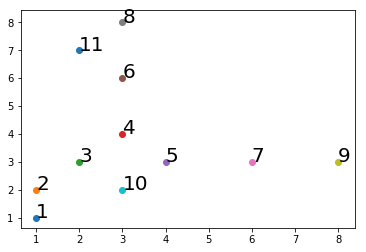

In [44]:
import matplotlib.pyplot as plt
match_idx  = 5
for i in range(11):
    plt.scatter(away_positions[match_idx][i], away_positions[match_idx][i+1])    
    plt.text(away_positions[match_idx][i], away_positions[match_idx][i+1], f'{i+1}', fontdict={'fontsize':20})

In [45]:
# drop position columns
data_final.drop(home_position_columns + away_position_columns, 1, inplace=True)

ValueError: labels ['home_player_X1' 'home_player_Y1' 'home_player_X2' 'home_player_Y2'
 'home_player_X3' 'home_player_Y3' 'home_player_X4' 'home_player_Y4'
 'home_player_X5' 'home_player_Y5' 'home_player_X6' 'home_player_Y6'
 'home_player_X7' 'home_player_Y7' 'home_player_X8' 'home_player_Y8'
 'home_player_X9' 'home_player_Y9' 'home_player_X10' 'home_player_Y10'
 'home_player_X11' 'home_player_Y11' 'away_player_X1' 'away_player_Y1'
 'away_player_X2' 'away_player_Y2' 'away_player_X3' 'away_player_Y3'
 'away_player_X4' 'away_player_Y4' 'away_player_X5' 'away_player_Y5'
 'away_player_X6' 'away_player_Y6' 'away_player_X7' 'away_player_Y7'
 'away_player_X8' 'away_player_Y8' 'away_player_X9' 'away_player_Y9'
 'away_player_X10' 'away_player_Y10' 'away_player_X11' 'away_player_Y11'] not contained in axis

In [46]:
data_final.head(1)

,id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,home_player_1_overall_rating,home_player_1_potential,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,home_player_1_short_passing,home_player_1_volleys,home_player_1_dribbling,home_player_1_curve,home_player_1_free_kick_accuracy,home_player_1_long_passing,home_player_1_ball_control,home_player_1_acceleration,home_player_1_sprint_speed,home_player_1_agility,home_player_1_reactions,home_player_1_balance,home_player_1_shot_power,home_player_1_jumping,home_player_1_stamina,home_player_1_strength,home_player_1_long_shots,home_player_1_aggression,home_player_1_interceptions,home_player_1_positioning,home_player_1_vision,home_player_1_penalties,home_player_1_marking,home_player_1_standing_tackle,home_player_1_sliding_tackle,home_player_1_gk_diving,home_player_1_gk_handling,home_player_1_gk_kicking,home_player_1_gk_positioning,home_player_1_gk_reflexes,home_player_2_overall_rating,home_player_2_potential,home_player_2_crossing,home_player_2_finishing,home_player_2_heading_accuracy,home_player_2_short_passing,home_player_2_volleys,home_player_2_dribbling,home_player_2_curve,home_player_2_free_kick_accuracy,home_player_2_long_passing,home_player_2_ball_control,home_player_2_acceleration,home_player_2_sprint_speed,home_player_2_agility,home_player_2_reactions,home_player_2_balance,home_player_2_shot_power,home_player_2_jumping,home_player_2_stamina,home_player_2_strength,home_player_2_long_shots,home_player_2_aggression,home_player_2_interceptions,home_player_2_positioning,home_player_2_vision,home_player_2_penalties,home_player_2_marking,home_player_2_standing_tackle,home_player_2_sliding_tackle,home_player_2_gk_diving,home_player_2_gk_handling,home_player_2_gk_kicking,home_player_2_gk_positioning,home_player_2_gk_reflexes,home_player_3_overall_rating,home_player_3_potential,home_player_3_crossing,home_player_3_finishing,home_player_3_heading_accuracy,home_player_3_short_passing,home_player_3_volleys,home_player_3_dribbling,home_player_3_curve,home_player_3_free_kick_accuracy,home_player_3_long_passing,home_player_3_ball_control,home_player_3_acceleration,home_player_3_sprint_speed,home_player_3_agility,home_player_3_reactions,home_player_3_balance,home_player_3_shot_power,home_player_3_jumping,home_player_3_stamina,home_player_3_strength,home_player_3_long_shots,home_player_3_aggression,home_player_3_interceptions,home_player_3_positioning,home_player_3_vision,home_player_3_penalties,home_player_3_marking,home_player_3_standing_tackle,home_player_3_sliding_tackle,home_player_3_gk_diving,home_player_3_gk_handling,home_player_3_gk_kicking,home_player_3_gk_positioning,home_player_3_gk_reflexes,home_player_4_overall_rating,home_player_4_potential,home_player_4_preferred_foot,home_player_4_attacking_work_rate,home_player_4_defensive_work_rate,home_player_4_crossing,home_player_4_finishing,home_player_4_heading_accuracy,home_player_4_short_passing,home_player_4_volleys,home_player_4_dribbling,home_player_4_curve,home_player_4_free_kick_accuracy,home_player_4_long_passing,home_player_4_ball_control,home_player_4_acceleration,home_player_4_sprint_speed,home_player_4_agility,home_player_4_reactions,home_player_4_balance,home_player_4_shot_power,home_player_4_jumping,home_player_4_stamina,home_player_4_strength,home_player_4_long_shots,home_player_4_aggression,home_player_4_interceptions,home_player_4_positioning,home_player_4_vision,home_player_4_penalties,home_player_4_marking,home_player_4_standing_tackle,home_player_4_sliding_tackle,home_player_4_gk_diving,home_player_4_gk_handling,home_player_4_gk_kicking,home_playe

In [47]:
nunique_cols = col_nunique(data_final)
nas_cols = col_nas(data_final)

In [48]:
# drop league and country
data_final.drop(['country_id', 'league_id_x','league_id_y'], 1, inplace=True)

ValueError: labels ['country_id' 'league_id_x' 'league_id_y'] not contained in axis

In [49]:
data_final.head(1)

,id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,home_player_1_overall_rating,home_player_1_potential,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,home_player_1_short_passing,home_player_1_volleys,home_player_1_dribbling,home_player_1_curve,home_player_1_free_kick_accuracy,home_player_1_long_passing,home_player_1_ball_control,home_player_1_acceleration,home_player_1_sprint_speed,home_player_1_agility,home_player_1_reactions,home_player_1_balance,home_player_1_shot_power,home_player_1_jumping,home_player_1_stamina,home_player_1_strength,home_player_1_long_shots,home_player_1_aggression,home_player_1_interceptions,home_player_1_positioning,home_player_1_vision,home_player_1_penalties,home_player_1_marking,home_player_1_standing_tackle,home_player_1_sliding_tackle,home_player_1_gk_diving,home_player_1_gk_handling,home_player_1_gk_kicking,home_player_1_gk_positioning,home_player_1_gk_reflexes,home_player_2_overall_rating,home_player_2_potential,home_player_2_crossing,home_player_2_finishing,home_player_2_heading_accuracy,home_player_2_short_passing,home_player_2_volleys,home_player_2_dribbling,home_player_2_curve,home_player_2_free_kick_accuracy,home_player_2_long_passing,home_player_2_ball_control,home_player_2_acceleration,home_player_2_sprint_speed,home_player_2_agility,home_player_2_reactions,home_player_2_balance,home_player_2_shot_power,home_player_2_jumping,home_player_2_stamina,home_player_2_strength,home_player_2_long_shots,home_player_2_aggression,home_player_2_interceptions,home_player_2_positioning,home_player_2_vision,home_player_2_penalties,home_player_2_marking,home_player_2_standing_tackle,home_player_2_sliding_tackle,home_player_2_gk_diving,home_player_2_gk_handling,home_player_2_gk_kicking,home_player_2_gk_positioning,home_player_2_gk_reflexes,home_player_3_overall_rating,home_player_3_potential,home_player_3_crossing,home_player_3_finishing,home_player_3_heading_accuracy,home_player_3_short_passing,home_player_3_volleys,home_player_3_dribbling,home_player_3_curve,home_player_3_free_kick_accuracy,home_player_3_long_passing,home_player_3_ball_control,home_player_3_acceleration,home_player_3_sprint_speed,home_player_3_agility,home_player_3_reactions,home_player_3_balance,home_player_3_shot_power,home_player_3_jumping,home_player_3_stamina,home_player_3_strength,home_player_3_long_shots,home_player_3_aggression,home_player_3_interceptions,home_player_3_positioning,home_player_3_vision,home_player_3_penalties,home_player_3_marking,home_player_3_standing_tackle,home_player_3_sliding_tackle,home_player_3_gk_diving,home_player_3_gk_handling,home_player_3_gk_kicking,home_player_3_gk_positioning,home_player_3_gk_reflexes,home_player_4_overall_rating,home_player_4_potential,home_player_4_preferred_foot,home_player_4_attacking_work_rate,home_player_4_defensive_work_rate,home_player_4_crossing,home_player_4_finishing,home_player_4_heading_accuracy,home_player_4_short_passing,home_player_4_volleys,home_player_4_dribbling,home_player_4_curve,home_player_4_free_kick_accuracy,home_player_4_long_passing,home_player_4_ball_control,home_player_4_acceleration,home_player_4_sprint_speed,home_player_4_agility,home_player_4_reactions,home_player_4_balance,home_player_4_shot_power,home_player_4_jumping,home_player_4_stamina,home_player_4_strength,home_player_4_long_shots,home_player_4_aggression,home_player_4_interceptions,home_player_4_positioning,home_player_4_vision,home_player_4_penalties,home_player_4_marking,home_player_4_standing_tackle,home_player_4_sliding_tackle,home_player_4_gk_diving,home_player_4_gk_handling,home_player_4_gk_kicking,home_playe

### model

In [50]:
columns = data_final.columns

In [51]:
columns[data_final.columns.str.contains('goal')]

Index(['home_team_goal', 'away_team_goal', 'home_team_goals_difference', 'away_team_goals_difference'], dtype='object')

In [52]:
data_final.head(1)

,id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,home_player_1_overall_rating,home_player_1_potential,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,home_player_1_short_passing,home_player_1_volleys,home_player_1_dribbling,home_player_1_curve,home_player_1_free_kick_accuracy,home_player_1_long_passing,home_player_1_ball_control,home_player_1_acceleration,home_player_1_sprint_speed,home_player_1_agility,home_player_1_reactions,home_player_1_balance,home_player_1_shot_power,home_player_1_jumping,home_player_1_stamina,home_player_1_strength,home_player_1_long_shots,home_player_1_aggression,home_player_1_interceptions,home_player_1_positioning,home_player_1_vision,home_player_1_penalties,home_player_1_marking,home_player_1_standing_tackle,home_player_1_sliding_tackle,home_player_1_gk_diving,home_player_1_gk_handling,home_player_1_gk_kicking,home_player_1_gk_positioning,home_player_1_gk_reflexes,home_player_2_overall_rating,home_player_2_potential,home_player_2_crossing,home_player_2_finishing,home_player_2_heading_accuracy,home_player_2_short_passing,home_player_2_volleys,home_player_2_dribbling,home_player_2_curve,home_player_2_free_kick_accuracy,home_player_2_long_passing,home_player_2_ball_control,home_player_2_acceleration,home_player_2_sprint_speed,home_player_2_agility,home_player_2_reactions,home_player_2_balance,home_player_2_shot_power,home_player_2_jumping,home_player_2_stamina,home_player_2_strength,home_player_2_long_shots,home_player_2_aggression,home_player_2_interceptions,home_player_2_positioning,home_player_2_vision,home_player_2_penalties,home_player_2_marking,home_player_2_standing_tackle,home_player_2_sliding_tackle,home_player_2_gk_diving,home_player_2_gk_handling,home_player_2_gk_kicking,home_player_2_gk_positioning,home_player_2_gk_reflexes,home_player_3_overall_rating,home_player_3_potential,home_player_3_crossing,home_player_3_finishing,home_player_3_heading_accuracy,home_player_3_short_passing,home_player_3_volleys,home_player_3_dribbling,home_player_3_curve,home_player_3_free_kick_accuracy,home_player_3_long_passing,home_player_3_ball_control,home_player_3_acceleration,home_player_3_sprint_speed,home_player_3_agility,home_player_3_reactions,home_player_3_balance,home_player_3_shot_power,home_player_3_jumping,home_player_3_stamina,home_player_3_strength,home_player_3_long_shots,home_player_3_aggression,home_player_3_interceptions,home_player_3_positioning,home_player_3_vision,home_player_3_penalties,home_player_3_marking,home_player_3_standing_tackle,home_player_3_sliding_tackle,home_player_3_gk_diving,home_player_3_gk_handling,home_player_3_gk_kicking,home_player_3_gk_positioning,home_player_3_gk_reflexes,home_player_4_overall_rating,home_player_4_potential,home_player_4_preferred_foot,home_player_4_attacking_work_rate,home_player_4_defensive_work_rate,home_player_4_crossing,home_player_4_finishing,home_player_4_heading_accuracy,home_player_4_short_passing,home_player_4_volleys,home_player_4_dribbling,home_player_4_curve,home_player_4_free_kick_accuracy,home_player_4_long_passing,home_player_4_ball_control,home_player_4_acceleration,home_player_4_sprint_speed,home_player_4_agility,home_player_4_reactions,home_player_4_balance,home_player_4_shot_power,home_player_4_jumping,home_player_4_stamina,home_player_4_strength,home_player_4_long_shots,home_player_4_aggression,home_player_4_interceptions,home_player_4_positioning,home_player_4_vision,home_player_4_penalties,home_player_4_marking,home_player_4_standing_tackle,home_player_4_sliding_tackle,home_player_4_gk_diving,home_player_4_gk_handling,home_player_4_gk_kicking,home_playe

In [53]:
# targets
total_goals = data_final[["home_team_goal", "away_team_goal"]].sum(1) 
match_outcome = data_final.home_team_goal.astype(int) - data_final.away_team_goal.astype(int) + 1

In [54]:
match_outcome = np.zeros_like(data_final.home_team_goal)
away_msk = data_final.home_team_goal.astype(int) < data_final.away_team_goal.astype(int) 
draw_msk = data_final.home_team_goal.astype(int) == data_final.away_team_goal.astype(int) 
match_outcome[away_msk] = 2
match_outcome[draw_msk] = 1

In [55]:
data_final.columns[data_final.columns.str.contains('_id')]

Index(['match_api_id', 'home_team_api_id', 'away_team_api_id'], dtype='object')

In [56]:
cat_df = data_final.select_dtypes('category')

In [57]:
for c in cat_df.columns:
    data_final[c] = cat_df[c].cat.codes

In [58]:
# drop 
df = data_final.drop(['date', 'stage', 'date', 'match_api_id', 'home_team_goal','away_team_goal'], 1)

In [59]:
# drop
df = df.drop('id', 1)

In [60]:
# drop
player_id_cols = df.columns[df.columns.str.match('(home|away)_player_\d+$')]
df = df.drop(player_id_cols, 1)

In [61]:
# drop outcome
df.drop('outcome', 1, inplace=True)

In [62]:
df.head()

,home_team_api_id,away_team_api_id,home_player_1_overall_rating,home_player_1_potential,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,home_player_1_short_passing,home_player_1_volleys,home_player_1_dribbling,home_player_1_curve,home_player_1_free_kick_accuracy,home_player_1_long_passing,home_player_1_ball_control,home_player_1_acceleration,home_player_1_sprint_speed,home_player_1_agility,home_player_1_reactions,home_player_1_balance,home_player_1_shot_power,home_player_1_jumping,home_player_1_stamina,home_player_1_strength,home_player_1_long_shots,home_player_1_aggression,home_player_1_interceptions,home_player_1_positioning,home_player_1_vision,home_player_1_penalties,home_player_1_marking,home_player_1_standing_tackle,home_player_1_sliding_tackle,home_player_1_gk_diving,home_player_1_gk_handling,home_player_1_gk_kicking,home_player_1_gk_positioning,home_player_1_gk_reflexes,home_player_2_overall_rating,home_player_2_potential,home_player_2_crossing,home_player_2_finishing,home_player_2_heading_accuracy,home_player_2_short_passing,home_player_2_volleys,home_player_2_dribbling,home_player_2_curve,home_player_2_free_kick_accuracy,home_player_2_long_passing,home_player_2_ball_control,home_player_2_acceleration,home_player_2_sprint_speed,home_player_2_agility,home_player_2_reactions,home_player_2_balance,home_player_2_shot_power,home_player_2_jumping,home_player_2_stamina,home_player_2_strength,home_player_2_long_shots,home_player_2_aggression,home_player_2_interceptions,home_player_2_positioning,home_player_2_vision,home_player_2_penalties,home_player_2_marking,home_player_2_standing_tackle,home_player_2_sliding_tackle,home_player_2_gk_diving,home_player_2_gk_handling,home_player_2_gk_kicking,home_player_2_gk_positioning,home_player_2_gk_reflexes,home_player_3_overall_rating,home_player_3_potential,home_player_3_crossing,home_player_3_finishing,home_player_3_heading_accuracy,home_player_3_short_passing,home_player_3_volleys,home_player_3_dribbling,home_player_3_curve,home_player_3_free_kick_accuracy,home_player_3_long_passing,home_player_3_ball_control,home_player_3_acceleration,home_player_3_sprint_speed,home_player_3_agility,home_player_3_reactions,home_player_3_balance,home_player_3_shot_power,home_player_3_jumping,home_player_3_stamina,home_player_3_strength,home_player_3_long_shots,home_player_3_aggression,home_player_3_interceptions,home_player_3_positioning,home_player_3_vision,home_player_3_penalties,home_player_3_marking,home_player_3_standing_tackle,home_player_3_sliding_tackle,home_player_3_gk_diving,home_player_3_gk_handling,home_player_3_gk_kicking,home_player_3_gk_positioning,home_player_3_gk_reflexes,home_player_4_overall_rating,home_player_4_potential,home_player_4_preferred_foot,home_player_4_attacking_work_rate,home_player_4_defensive_work_rate,home_player_4_crossing,home_player_4_finishing,home_player_4_heading_accuracy,home_player_4_short_passing,home_player_4_volleys,home_player_4_dribbling,home_player_4_curve,home_player_4_free_kick_accuracy,home_player_4_long_passing,home_player_4_ball_control,home_player_4_acceleration,home_player_4_sprint_speed,home_player_4_agility,home_player_4_reactions,home_player_4_balance,home_player_4_shot_power,home_player_4_jumping,home_player_4_stamina,home_player_4_strength,home_player_4_long_shots,home_player_4_aggression,home_player_4_interceptions,home_player_4_positioning,home_player_4_vision,home_player_4_penalties,home_player_4_marking,home_player_4_standing_tackle,home_player_4_sliding_tackle,home_player_4_gk_diving,home_player_4_gk_handling,home_player_4_gk_kicking,home_player_4_gk_positioning,home_player_4_gk_reflexes,home_player_5_overall_rating,home_player_5_potential,home_player_5_preferred_foot,home_player_5_attacking_work_rate,home_player_5_defensive_work_rate,home_player_5_crossing,home_player_5_finishing,home_player_5_heading_accuracy,home_player_5_short_passing,home_player_5_volleys,home_player_5_dribbling,home_player_5_curve,ho

### Classification

In [63]:
from xgb_learn.dataset import XGBModelData
from xgb_learn.learner import XGBLearner

In [205]:
trn_msk = data_final.date.dt.year <= 2014
val_msk = data_final.date.dt.year == 2015
test_msk = data_final.date.dt.year == 2016

In [206]:
trn_df = df[trn_msk]
val_df = df[val_msk]
test_df = df[test_msk]

trn_y = match_outcome[trn_msk]
val_y = match_outcome[val_msk]

In [207]:
# create model data
xgb_md = XGBModelData(trn_df, val_df, trn_y, val_y, test_df)

In [208]:
dtrain, dval, evals = xgb_md.get_train_eval_ds()
dtrain.num_row(), dval.num_row()

(6461, 1051)

In [209]:
# create learner
xgb_learner = XGBLearner(dtrain, evals, False, 0.001, "multi:softprob", "merror", True, 7)

In [210]:
# init
# you can change initial params if they don't work well
xgb_learner.params

{'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'eta': 0.001,
 'eval_metric': 'merror',
 'gamma': 1,
 'max_depth': 5,
 'min_child_weight': 10,
 'num_class': 3,
 'objective': 'multi:softprob',
 'seed': 20,
 'subsample': 1}

In [211]:
# initializes booster for num rounds
xgb_learner.initialize()

In [212]:
# starter num rounds to be used in random search
xgb_learner.num_rounds

84

In [214]:
# do random search
# you can call this function as many times as you like
# every time it will update best params and best iterations
xgb_learner.random_search(20, verbose=True)

Found new best score 0.482398
Found new best score 0.479543
----------------------------------------
Best params and best iteration are found
----------------------------------------


### Regression

In [289]:
trn_df = df[trn_msk]
val_df = df[val_msk]
test_df = df[test_msk]

trn_y = total_goals[trn_msk]
val_y = total_goals[val_msk]

In [290]:
# create model data
xgb_md = XGBModelData(trn_df, val_df, trn_y, val_y, test_df)

In [291]:
dtrain, dval, evals = xgb_md.get_train_eval_ds()
dtrain.num_row(), dval.num_row()

(6461, 1051)

In [292]:
# create learner
xgb_learner = XGBLearner(dtrain, evals, False, 0.05, "reg:linear", "mae", False, 7)

In [293]:
xgb_learner.initialize()

Initialization Successful


In [294]:
xgb_learner.num_rounds

27

In [303]:
# do random search
# you can call this function as many times as you like
# every time it will update best params and best iterations
xgb_learner.random_search(1, verbose=True)

----------------------------------------
Best params and best iteration are found
----------------------------------------


In [264]:
# get full training
dtrain, dtest = xgb_md.get_train_test_ds()

In [265]:
# fit best model
xgb_learner.fit_best_model(dtrain)

(array([ 37., 179., 146.,  95.,  42.,  11.,   8.,   8.,   4.,   3.]),
 array([2.13422227, 2.26233659, 2.39045091, 2.51856523, 2.64667954,
        2.77479386, 2.90290818, 3.0310225 , 3.15913682, 3.28725114,
        3.41536546]),
 <a list of 10 Patch objects>)

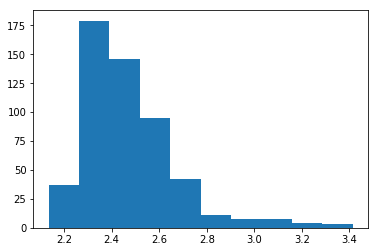

In [244]:
# predict
preds = xgb_learner.predict(dtest)
plt.hist(preds)

In [243]:
over25 = total_goals[test_msk] > 2.5

In [246]:
over25preds = (preds > 2.5)

In [249]:
np.mean(over25 == over25preds)

0.5140712945590994